#Model Testing
Input:

> If you didn't run testing right after training model, then you need to load model.
>> model class and setting

>> model.pt

> And
>> X_test : testing data  (testing_data_num, sequence_num, feature_num)

>> Y_test : testing label (testing_data_num, output_num)

Output:

> test.csv : 將所有資料及預測結果存入csv中, 包含data,真實值,預測值,真實良品/不良品, 預測良品/不良品

> Accuracy : 整體準確率、良品預測準確率、不良品預測準確率

> X_test_correct & X_test_wrong : 預測正確/錯誤的testing data

> Confusion matrix

In [ ]:
import pandas as pd
import numpy as np
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F
import matplotlib.pyplot as plt

# below is for loading data from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

sequence_num = 100
print("Sequence number: ", sequence_num)

# put your folder path, ex: '/content/drive/MyDrive/.../'
folder_path = 'folderpath'

# put model name, ex: 'model.pt' for model path
model_path = folder_path + 'modelname'

# put testing data and label npy file path, ex: 'x_test.npy', 'y_test.npy'
X_test = np.load(folder_path + 'x_test.npy')
Y_test = np.load(folder_path + 'y_test.npy')
print(X_test.shape) #(testing_data_num, sequence_num, feature_num)
print(Y_test.shape) #(testing_data_num, output_num)

Mounted at /content/drive
Sequence number:  100
(144, 100, 3)
(144, 26)


#Load model
Model class and setting for load model.
If you testing after training model, you can pass.

In [ ]:
"""
model class, should cpoy from training model
"""
class BiLSTM_layer(nn.Module):
  pass

class DataEncoder(nn.Module):
  pass

class minmax_RuleEncoder(nn.Module):
  pass
    
class outbound_RuleEncoder(nn.Module):
  pass
    
class DataonlyNet(nn.Module):
  pass

class Net(nn.Module):
  pass

In [ ]:
"""
model setting, should cpoy from training model
"""
# merge = 

# input_dim = 
# input_dim_encoder = 
# output_dim_encoder = 
# hidden_dim_encoder = 
# hidden_dim_db = 
# output_dim_encoder = output_dim_encoder
# hidden_dim_encoder = hidden_dim_encoder
# hidden_dim_db = hidden_dim_db
# output_dim = 
# n_layers = 
# use_type=''

# outbound_rule_encoder = outbound_RuleEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)
# minmax_rule_encoder = minmax_RuleEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)
# data_encoder = DataEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)

# if use_type=='no_rule':
#   model = Net(input_dim, output_dim, minmax_rule_encoder, outbound_rule_encoder, data_encoder, hidden_dim=hidden_dim_db, n_layers=n_layers, merge=merge)
# else:
#   model =DataonlyNet (input_dim, output_dim, data_encoder, hidden_dim=hidden_dim_db, n_layers=n_layers)

In [ ]:
"""
Load model, and change X_test to tensor
"""
model = torch.load(model_path)
model.eval()

X_test = torch.tensor(X_test).to(torch.float32)

#Testing

In [ ]:
"""
Testing
"""
with torch.no_grad():
  pred = model(X_test, alpha=0.1, beta=0.1)

print("Done")

Done


In [ ]:
"""
規格判斷, data可以是真實或預測結果, partNo為料號編號
"""
def measure_std(data, partNo):
  measure = []
  for data_num in range(len(data)):
    partNo = partNo
    if partNo == "0162B00100":
      max_std = [3.35, 2.30, 6.30, 2.77, 2.30, 3.37, 2.54, 0.42, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 2.10, 3.23, 2.34, 0.38, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B00200":
      max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B00200-1":
      max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
      min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

    elif partNo == "0162B01100":
      max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B01100-1":
      max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
      min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

    else:
      return "Error"

    wrong = False
    for detail_num in range(13):
      if data[data_num][detail_num] > max_std[detail_num] or data[data_num][detail_num] < min_std[detail_num]:
        wrong = True
      
      if data[data_num][detail_num+13] > max_std[detail_num] or data[data_num][detail_num+13] < min_std[detail_num]: 
        wrong = True

    if wrong == True:
      measure.append(0) # notok
    else:
      measure.append(1) # ok

  return measure

In [ ]:
"""
將所有資料以dataframe形式存入csv中
欄位0~299為data, true+編號 為真實值, pred+編號 為預測值,
 measure_true為真實良品/不良品, measure_pred為預測良品/不良品
"""
df = pd.DataFrame(X_test.reshape(-1, sequence_num*3).numpy())
y_df = pd.DataFrame(Y_test)
p_df = pd.DataFrame(pred.numpy())

for i in range(26):
  df['true'+str(i+1)] = y_df[i]
  df['pred'+str(i+1)] = p_df[i]

measure_true = np.array(measure_std(Y_test, "0162B00100"))
measure_pred = np.array(measure_std(pred, "0162B00100"))

df['measure_true'] = measure_true
df['measure_pred'] = measure_pred

df.to_csv(folder_path +"/test.csv", header=True, index=True) 
print(df.head(10))

       0    1         2      3    4         5      6    7         8      9  \
0  321.0  2.0  5.366667  321.0  2.0  5.350000  321.0  2.0  5.350000  321.0   
1  330.0  2.0  2.866667  346.0  1.0  3.966667  330.0  2.0  5.483333  330.0   
2  310.0  2.0  5.150000  310.0  2.0  5.183333  310.0  2.0  0.183333  325.0   
3  310.0  2.0  5.133333  310.0  2.0  5.150000  310.0  2.0  5.116667  310.0   
4  310.0  2.0  5.133333  310.0  2.0  5.183333  310.0  2.0  2.950000  325.0   
5  325.0  1.0  0.950000  310.0  2.0  5.133333  310.0  2.0  5.150000  310.0   
6  310.0  2.0  5.150000  310.0  2.0  5.150000  310.0  2.0  5.166667  310.0   
7  321.0  1.0  5.366667  321.0  2.0  2.833333  348.0  1.0  3.083333  188.0   
8   52.0  4.0  0.016667  224.0  4.0  0.016667  421.0  1.0  0.900000  401.0   
9  351.0  1.0  4.116667  334.0  2.0  5.566667  334.0  2.0  5.566667  334.0   

   ...  true23    pred23  true24    pred24  true25    pred25  true26  \
0  ...   0.546  0.573602   0.553  0.559123   0.551  0.554407   0.543 

In [ ]:
"""
計算個數及準確率
整體準確率 = (真實良品&預測良品筆數 + 真實不良品&預測不良品筆數) / 總筆數 
良品準確率 = 真實良品&預測良品筆數  / 真實良品筆數 
不良品準確率 = 真實不良品&預測不良品筆數  / 真實不良品筆數
"""
test_measure_ok=0
pred_measure_ok=0
test_measure_nok=0
pred_measure_nok=0
test_measure_ok_arr=[]
pred_measure_ok_arr=[]
X_test_correct=[]
X_test_wrong=[]

for test_num in range(len(X_test)):
  if measure_true[test_num]==1:
    test_measure_ok +=1
    test_measure_ok_arr.append(1)
    if measure_pred[test_num]==1:
      pred_measure_ok +=1
      pred_measure_ok_arr.append(1)
      X_test_correct.append(X_test[test_num].numpy())
    else:
      pred_measure_ok_arr.append(0)
      X_test_wrong.append(X_test[test_num].numpy())
     
  else:
    test_measure_nok +=1
    test_measure_ok_arr.append(0)
    if measure_pred[test_num]==1:
      pred_measure_ok_arr.append(1)
      X_test_wrong.append(X_test[test_num].numpy())
    else:
      pred_measure_nok +=1
      pred_measure_ok_arr.append(0)
      X_test_correct.append(X_test[test_num].numpy())


print("實際值良品：",test_measure_ok,"個")
print("實際值良品 & 預測值良品：",pred_measure_ok,"個")
print("良品預測準確率：",pred_measure_ok/test_measure_ok)
print()
print("實際值不良品：",test_measure_nok,"個")
print("實際值不良品 & 預測值不良品：",pred_measure_nok,"個")
if test_measure_nok != 0:
  print("不良品預測準確率：",pred_measure_nok/test_measure_nok)
else:
  print("不良品預測準確率：","無不良品")
print()
print("準確率：",(pred_measure_ok+pred_measure_nok)/len(X_test))

實際值良品： 143 個
實際值良品 & 預測值良品： 140 個
良品預測準確率： 0.9790209790209791

實際值不良品： 1 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 0.0

準確率： 0.9722222222222222


In [ ]:
"""
將預測正確與錯誤之data另外儲存
"""
np.save(folder_path + 'x_test_correct.npy', X_test_correct)
np.save(folder_path + 'x_test_wrong.npy', X_test_wrong)
print("Correct num:", len(X_test_correct))
print("Wrong num:", len(X_test_wrong))

Correct num: 140
Wrong num: 4


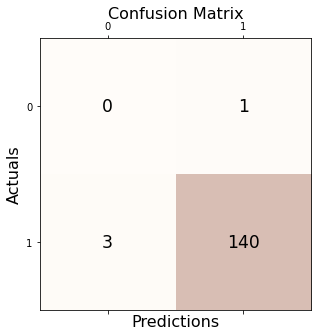

In [ ]:
"""
Show testing confusion matrix
0為不良品, 1為良品
"""
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=test_measure_ok_arr, y_pred=pred_measure_ok_arr)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=16)
plt.show()